<a href="https://colab.research.google.com/github/AhmedZaghl0ul/Machine-Learning/blob/main/WA_Fn_UseC__HR_Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
len(df.columns)

35

<Axes: xlabel='Attrition', ylabel='count'>

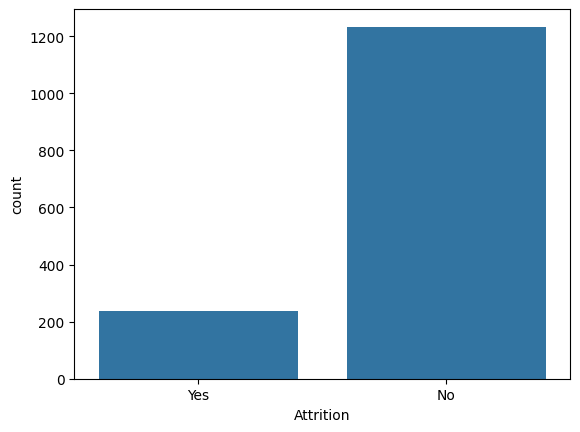

In [7]:
sns.countplot(x = 'Attrition' , data =df)

In [11]:
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

In [12]:
categorical = [i for i in df.columns if df[i].dtype == 'O']

In [13]:
categorical

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [16]:
numerical = [i for i in df.columns if df[i].dtype != 'O']

In [17]:
numerical

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [18]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [19]:
df['Attrition'] = df.Attrition.astype('category').cat.codes

In [20]:
df['Attrition'].unique()

array([1, 0], dtype=int8)

In [21]:
categorical.remove('Attrition')

In [22]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for c in categorical:
  df[c] = label.fit_transform(df[c])

In [23]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [25]:
df.reset_index(drop=True , inplace=True)

In [26]:
from sklearn.model_selection import train_test_split

x = df.drop('Attrition' , axis=1)
y = df['Attrition']

xtrain , xtest, ytrain , ytest = train_test_split(x , y , test_size=0.3 , random_state=40)

In [27]:
dsc =DecisionTreeClassifier(criterion='gini',max_depth=10)
dsc.fit(xtrain , ytrain)
ypred = dsc.predict(xtest)
print(classification_report(ytest , ypred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       370
           1       0.41      0.37      0.39        71

    accuracy                           0.81       441
   macro avg       0.64      0.63      0.64       441
weighted avg       0.80      0.81      0.81       441



In [30]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(xtrain, ytrain)

In [31]:
dsc =DecisionTreeClassifier(criterion='gini',max_depth=10)
dsc.fit(X_train_res , y_train_res)
ypred = dsc.predict(xtest)
print(classification_report(ytest , ypred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       370
           1       0.32      0.46      0.38        71

    accuracy                           0.76       441
   macro avg       0.60      0.64      0.61       441
weighted avg       0.80      0.76      0.77       441



In [38]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion' : ('gini' , 'entropy'),
    'splitter' : ('best' , 'random'),
    'max_depth' : (list(range(1,21))),
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': (list(range(1,21)))
}

ds =DecisionTreeClassifier()
cv = GridSearchCV(
    ds,
    params,
    scoring='f1',
    n_jobs=-1,
    cv=5,
    verbose=1
)

cv.fit(xtrain , ytrain)
bestparams = cv.best_params_
print(f'Best Paramters : {bestparams}')
tr = DecisionTreeClassifier(**bestparams)
tr.fit(xtrain , ytrain)
# best_model =
ypred = tr.predict(xtest)
print(classification_report(ytest , ypred))

Fitting 5 folds for each of 4800 candidates, totalling 24000 fits
Best Paramters : {'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 6, 'min_samples_split': 4, 'splitter': 'random'}
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       370
           1       0.54      0.38      0.45        71

    accuracy                           0.85       441
   macro avg       0.71      0.66      0.68       441
weighted avg       0.83      0.85      0.84       441



In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_smote = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight='balanced',
    random_state=42
)

rf_smote.fit(X_train_res, y_train_res)
ypred_rf = rf_smote.predict(xtest)

print(classification_report(ytest, ypred_rf))


              precision    recall  f1-score   support

           0       0.87      0.94      0.91       370
           1       0.49      0.28      0.36        71

    accuracy                           0.84       441
   macro avg       0.68      0.61      0.63       441
weighted avg       0.81      0.84      0.82       441



In [39]:
from sklearn.model_selection import RandomizedSearchCV

params = {

    'max_depth' : [None , 5 ,10,20],
    'min_samples_split': [2, 5,10],
    'min_samples_leaf': [1,2,4],
    'max_features': ['sqrt' , 'log2'],
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 200, 300, 500]
}

rf =RandomForestClassifier()
cv = RandomizedSearchCV(
    rf,
    param_distributions=params,
    scoring='f1',
    n_jobs=-1,
    cv=5,
    verbose=1,
    n_iter=200
)

cv.fit(xtrain , ytrain)
bestparams = cv.best_params_
print(f'Best Paramters : {bestparams}')
tr = RandomForestClassifier(**bestparams)
tr.fit(xtrain , ytrain)
# best_model =
ypred = tr.predict(xtest)
print(classification_report(ytest , ypred))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Paramters : {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'entropy'}
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       370
           1       1.00      0.17      0.29        71

    accuracy                           0.87       441
   macro avg       0.93      0.58      0.61       441
weighted avg       0.88      0.87      0.82       441

